# Animation in matplotlib
<a href="https://colab.research.google.com/github/LinkHS/Colab/blob/master/matplotlib/animation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

References:
- (matplotlib): [matplotlib.animation](https://matplotlib.org/stable/api/animation_api.html)



## jshtml
Use `plt.rcParams["animation.html"] = "jshtml"` at the beginning of the notebook. This will display the animation as HTML with JavaScript. This is highly compatible with most new browsers.

也可以避免设置全局`jshtml`，参见HTML章节中的`HTML(ani.to_jshtml())`。

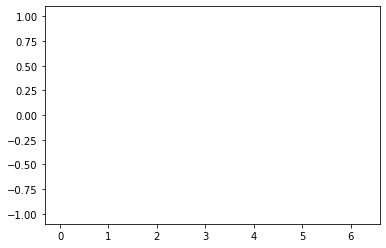

In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

plt.rcParams["animation.html"] = "jshtml"

t = np.linspace(0,2*np.pi)
x = np.sin(t)

fig, ax = plt.subplots()
l, = ax.plot([0,2*np.pi], [-1,1])

animate = lambda i: l.set_data(t[:i], x[:i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))
ani

### 增加`init()`显示结果
在`init_func()`中返回绘制后的句柄，如`ln, = ax.plot([0,2*np.pi], [-1,1])`中的`ln`，可以在静态图中预览结果。



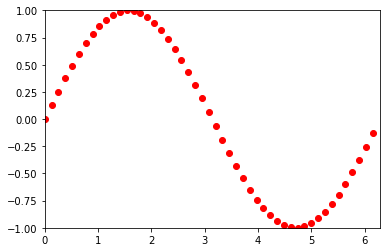

In [2]:
t = np.linspace(0,2*np.pi)
x = np.sin(t)

fig, ax = plt.subplots()
ln, = plt.plot([], [], 'ro')

def init():
  ax.set_xlim(0, 2*np.pi)
  ax.set_ylim(-1, 1)
  return ln

animate = lambda i: ln.set_data(t[:i], x[:i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t), init_func=init)
ani

## HTML
`IPython.display`中的`HTML`方式可以指定多种展示方式（避免全局设置）。


### jshtml

In [3]:
from IPython.display import HTML
HTML(ani.to_jshtml())

### html5

In [7]:
from IPython.display import HTML
HTML(ani.to_html5_video())

## [TODO] Save to file
TODO

In [10]:
# def frame(w):
#   ax.clear()

#   global x, y
#   x = x + np.random.normal(loc=0.0, scale=50.0, size=10)
#   y = y + np.random.normal(loc=0.0, scale=50.0, size=10)
  
#   ax.set_xlim(-500.0, 500.0) 
#   plot = ax.plot()
#   return plot

#ani = matplotlib.animation.FuncAnimation(fig, frame, frames=len(t), init_func=init)
#ani.save('sin.gif', writer = "pillow", fps=10)

## [TODO] Yield方式
https://matplotlib.org/2.0.2/examples/animation/animate_decay.html

## 3D Animation

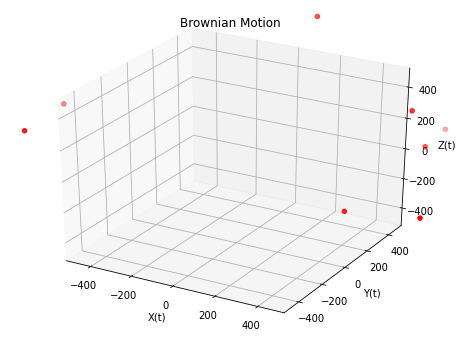

In [9]:
# Other Brownian Motion
from math import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.animation as animation

fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')

N = 10
#val1 = 500

x=500*np.random.random(N)
y=500*np.random.random(N)

z=500*np.random.random(N)

def frame(w):
  ax.clear()

  global x,y,z
  x=x+np.random.normal(loc=0.0,scale=50.0,size=10)
  y=y+np.random.normal(loc=0.0,scale=50.0,size=10)
  z=z+np.random.normal(loc=0.0,scale=50.0,size=10)

  plt.title("Brownian Motion")
  ax.set_xlabel('X(t)')
  ax.set_xlim3d(-500.0,500.0)
  ax.set_ylabel('Y(t)')
  ax.set_ylim3d(-500.0,500.0)
  ax.set_zlabel('Z(t)')

  ax.set_zlim3d(-500.0,500.0) 
  plot=ax.scatter3D(x, y, z, c='r')
  return plot

anim = animation.FuncAnimation(fig, frame, frames=100, blit=False, repeat=True)
anim
# anim.save('BrowniamMotion.gif', writer = "pillow", fps=10)